##Installing

In [1]:
!pip install future
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.5 MB/s 


##Requirements

In [2]:
# A
import argparse
# C
import cv2
# G
import glob
# H
import h5py
# I
import imgaug as ia
import importlib.util
# J
import json
# M
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# N
import numpy as np
# O
import os
# P
import pandas as pd
# R
import random
import rasterio
# S
import scipy.misc
import shutil
import signal
import sys
# T
import tensorflow
import time
# W
import webbrowser

### Keras
from keras.layers import  * 
from keras.models import Model, Sequential, load_model as keras_load_model
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger, TensorBoard, EarlyStopping
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import losses
from keras.optimizers import *
from keras.utils.generic_utils import get_custom_objects
### Tensor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
### Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
### Random
from random import randint
from random import shuffle
### ImgAug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
### Others
from IPython.display import clear_output
from google.colab import files

In [3]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

##Load Data

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suridianprtma","key":"5c14407b019f5bae5a357af3c4f47057"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d suridianprtma/images-labels-bone
!unzip images-labels-bone

os.mkdir('bone-labels')
os.mkdir('bone-tests')

for x in range(4200,4560):
  if os.path.isfile(f"/content/good_images_bone/good image bone_edited/{x}.png"):
    shutil.move(f"/content/good_images_bone/good image bone_edited/{x}.png", "/content/bone-tests")
for x in range(4200,4560):
  if os.path.isfile(f"/content/good_labels_bone/label_good image/{x}_label.png"):
    shutil.move(f"/content/good_labels_bone/label_good image/{x}_label.png", "/content/bone-labels")

!rm -rf good_images_bone
!rm -rf good_labels_bone
!rm -rf images-labels-bone.zip

 92% 169M/183M [00:07<00:00, 24.7MB/s]
100% 183M/183M [00:07<00:00, 25.1MB/s]
Archive:  images-labels-bone.zip
  inflating: good_images_bone/good image bone_edited/4362.png  
  inflating: good_images_bone/good image bone_edited/4369.png  
  inflating: good_images_bone/good image bone_edited/4371.png  
  inflating: good_images_bone/good image bone_edited/4377.png  
  inflating: good_images_bone/good image bone_edited/4379.png  
  inflating: good_images_bone/good image bone_edited/4381.png  
  inflating: good_images_bone/good image bone_edited/4388.png  
  inflating: good_images_bone/good image bone_edited/4390.png  
  inflating: good_images_bone/good image bone_edited/4401.png  
  inflating: good_images_bone/good image bone_edited/4403.png  
  inflating: good_images_bone/good image bone_edited/4408.png  
  inflating: good_images_bone/good image bone_edited/4411.png  
  inflating: good_images_bone/good image bone_edited/4417.png  
  inflating: good_images_bone/good image bone_edited/4419

##Generate Parameters

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import numpy
import json
import os
import sys

params_name = "parameters.txt"
save_folder = "/content/"

model = "/content/XNet.py"
name = "DLs200_64"

lrate = 0.0001
reg = 0
batch_size = 5
kernel_size = 5
filter_list =  [64,128,256,512,1024]
loss = "categorical_crossentropy"
data = "/content/bone-tests"
no_epochs = 5
duplicate = True

d = {"name":name,
     "model_path": model,
     "data_path": data,
     "save_folder": save_folder,
     "kernel_size": kernel_size,
     "batch_size": batch_size,
     "filters": filter_list,
     "lrate": lrate,
     "reg":reg,
     "loss": loss,
     "no_epochs": no_epochs,
     "duplicate": duplicate}

if (os.path.isfile(params_name)):
    confirm_metada = input("Warning params file exists, continue? (y/n) ")
    if(confirm_metada == "y"):
        os.remove(params_name)
    else:
        sys.exit()
        
with open(params_name, 'w') as fp:
    json.dump(d, fp)

##Get Model

In [8]:
!pip install import-ipynb
import import_ipynb

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
module = drive.CreateFile({'id':'1_bGw2qVLG_kRh4pzzceRdVHy82ANnk0C'})
module.GetContentFile('XNet.py')

####Copy & Paste - satu block kode dibawah ini ke dalam file XNet.py di /content/XNet/py (timpa seluruh kode sebelumnya)
##### [!] Jangan sertakan comment-nya

In [ ]:
'''
from keras.models import Model
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.layers import BatchNormalization, Reshape, Layer
from keras.layers import Activation, Flatten, Dense
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import losses

def model(input_shape=(64,64,3), classes=3, kernel_size = 3, filter_depth = (64,128,256,512,0)):
    
    img_input = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(filter_depth[0], (kernel_size, kernel_size), padding="same")(img_input)
    batch1 = BatchNormalization()(conv1)
    act1 = Activation("relu")(batch1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(act1)
    #100x100
    
    conv2 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(pool1)
    batch2 = BatchNormalization()(conv2)
    act2 = Activation("relu")(batch2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(act2)
    #50x50
    
    conv3 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(pool2)
    batch3 = BatchNormalization()(conv3)
    act3 = Activation("relu")(batch3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(act3)
    #25x25
    
    #Flat
    conv4 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(pool3)
    batch4 = BatchNormalization()(conv4)
    act4 = Activation("relu")(batch4)
    #25x25
    
    conv5 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(act4)
    batch5 = BatchNormalization()(conv5)
    act5 = Activation("relu")(batch5)
    #25x25
    
    #Up
    up6 = UpSampling2D(size=(2, 2))(act5)
    conv6 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(up6)
    batch6 = BatchNormalization()(conv6)
    act6 = Activation("relu")(batch6)
    concat6 = Concatenate()([act3,act6])
    #50x50
    
    up7 = UpSampling2D(size=(2, 2))(concat6)
    conv7 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(up7)
    batch7 = BatchNormalization()(conv7)
    act7 = Activation("relu")(batch7)
    concat7 = Concatenate()([act2,act7])
    #100x100
    
    #Down
    conv8 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(concat7)
    batch8 = BatchNormalization()(conv8)
    act8 = Activation("relu")(batch8)
    pool8 = MaxPooling2D(pool_size=(2, 2))(act8)
    #50x50
    
    conv9 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(pool8)
    batch9 = BatchNormalization()(conv9)
    act9 = Activation("relu")(batch9)
    pool9 = MaxPooling2D(pool_size=(2, 2))(act9)
    
    #25x25
    
    #Flat
    conv10 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(pool9)
    batch10 = BatchNormalization()(conv10)
    act10 = Activation("relu")(batch10)
    #25x25
    
    conv11 = Conv2D(filter_depth[3], (kernel_size, kernel_size), padding="same")(act10)
    batch11 = BatchNormalization()(conv11)
    act11 = Activation("relu")(batch11)
    #25x25
    
    #Encoder
    up12 = UpSampling2D(size=(2, 2))(act11)
    conv12 = Conv2D(filter_depth[2], (kernel_size, kernel_size), padding="same")(up12)
    batch12 = BatchNormalization()(conv12)
    act12 = Activation("relu")(batch12)
    concat12 = Concatenate()([act9,act12])
    #50x50
    
    up13 = UpSampling2D(size=(2, 2))(concat12)
    conv13 = Conv2D(filter_depth[1], (kernel_size, kernel_size), padding="same")(up13)
    batch13 = BatchNormalization()(conv13)
    act13 =  Activation("relu")(batch13)
    concat13 = Concatenate()([act8,act13])
    #100x100
    
    up14 = UpSampling2D(size=(2, 2))(concat13)
    conv14 = Conv2D(filter_depth[0], (kernel_size, kernel_size), padding="same")(up14)
    batch14 = BatchNormalization()(conv14)
    act14 = Activation("relu")(batch14)
    concat14 = Concatenate()([act1,act14])
    #200x200
    
    conv15 = Conv2D(classes, (1,1), padding="valid")(concat14)
    
    
    reshape15 = Reshape((input_shape[0]*input_shape[1],classes))(conv15)
    act15 = Activation("softmax")(reshape15)
    
    model = Model(img_input, act15)

    return model
'''

##RGB to Labels

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import cv2
import glob
from tensorflow.keras.utils import to_categorical

def get_mask_from_color( image, color ):
    """ Given one image and one color, returns a mask of the same shape as the image, with True values on the pixel positions with the same specified color"""
    rows, columns, channels = image.shape
    total_pixels = rows * columns
    image_flat = image.reshape(total_pixels, channels)
    color_array = np.array([color,] * total_pixels)
    channels_mask = np.isclose(image_flat, color_array, atol = 100)
    #combine channels
    mask = np.logical_and(channels_mask[:,0], channels_mask[:,1])
    mask = np.logical_and(mask, channels_mask[:,2])
    return mask.reshape(rows,columns)

def get_012_label(image, n_colors = 3, colors = [[255,255,255], [255,255,0], [0,0,255]]):
    """ Given one image, returns labeling 0,1,2 for 3 colours."""
    #color_0 = [255,255,255]
    #color_1 = [255,255,0]
    #color_2 = [0,0,255]
    
    label_012 = np.zeros((image.shape[0], image.shape[1]))
    
    if(n_colors == 2):
        mask = get_mask_from_color(image, colors[2])
        label_012[mask] = 1
    elif(n_colors == 3):
        mask = get_mask_from_color(image, colors[1])
        label_012[mask] = 1
        mask = get_mask_from_color(image, colors[2])
        label_012[mask] = 2
    else:
        print("number of colors not implemented")
        return False
    return label_012

def get_categorical_label(image, n_classes = 3):
    """ Given an image, computes the 012 label and uses keras to compute the categorical label"""
    label_012 = get_012_label(image, n_classes)
    return to_categorical(label_012, n_classes)

##Utils

In [10]:
import numpy as np
import random
import rasterio
import glob
import cv2
from random import shuffle
import os
import scipy.misc

# Utilities
def balanced_test_val_split(main_path, data_to_add, image_size, train_size, n_classes):
	images_found = []
	labels_found = []
	for category in data_to_add:
		
		print('Checking labels and data match in %s folder ...'%category)
		data_path =os.path.join( main_path , 'Images' , category )
		data_path += os.sep + '*.tif'
		 
		labels_path = os.path.join(main_path, 'Labels', category)
		labels_path += os.sep + '*.jpg'

		images = glob.glob(data_path)
		labels =  glob.glob(labels_path)
		assert len(labels) != 0
		assert len(labels) == len(images)

		# Check that they have the same names
		label_filename = []
		img_filename = []

		for (i, img) in enumerate(images):
			label_filename.append(labels[i].split(os.sep)[-1].split('.')[0].replace('onehot', ''))
			img_filename.append(img.split(os.sep)[-1].split('.')[0]  )

		label_filename = sorted(label_filename)
		img_filename = sorted(img_filename)
		
		for i in range(len(label_filename)):
			assert label_filename[i] == img_filename[i]
			images_found.append(  os.path.join(main_path , 'Images' , category) + os.sep + img_filename[i] + '.tif')
			labels_found.append(  os.path.join(main_path , 'Labels' , category) + os.sep + label_filename[i] + '.jpg')

		print('Names of labels and data in folder %s match perfectly, %d images found . '%(category, len(img_filename)))

	#shuffle images and labels 
	c = list(zip(images_found,labels_found))
	shuffle(c)
	images, labels = zip(*c)

	# Read and save all images + labels + bodypart
	images_read = np.zeros((len(images),image_size,image_size,1),dtype=np.float32)
	labels_read = np.zeros((len(labels), image_size, image_size,3),dtype=np.uint8)
	bodyparts = np.empty((len(images)),'S10')
	split_names = np.empty((len(images)),'S50')
	for i in range(len(images)):
		filename = images[i]
		img = rasterio.open(filename)
		img = img.read(1)
		images_read[i,...,0] = cv2.resize(img, (image_size, image_size), interpolation=cv2.INTER_AREA)

		label_filename = labels[i]
		labels_images = cv2.imread(label_filename)

		labels_read[i,...] = scipy.misc.imresize(labels_images, (image_size,image_size,3), interp='nearest', mode=None)
		labels_read[i,...] = np.uint8(labels_read[i,...])
		labels_read[i,...] = 255*get_categorical_label(labels_read[i,...], n_classes)

		# Clean bodyparts names
		bodypart = filename.split(os.sep)[-1].split('_')[0].lower()
		split_names[i] = filename.split(os.sep)[-1].split('.')[0].lower()
		if((bodypart == 'left') or (bodypart == 'right') or (bodypart == 'asg')):
			bodypart = filename.split(os.sep)[-1].split('_')[1]
			if(bodypart == 'fractured'):
				bodypart = filename.split(os.sep)[-1].split('_')[2]
			if(bodypart == 'lower'):
				bodypart = filename.split(os.sep)[-1].split('_')[2]
		if((bodypart == 'belly') or (bodypart == 'plate')):
				bodypart = filename.split(os.sep)[-1].split('_')[1]
		if((bodypart == 'leg') and (filename.split(os.sep)[-1].split('_')[1] == 'lamb')):
				bodypart = filename.split(os.sep)[-1].split('_')[1]              
		# Remove numbers
		bodypart = ''.join(i for i in bodypart if not i.isdigit())
		if(bodypart == 'nof'):
			bodypart = 'neckoffemur'
		bodypart = bodypart.split('.')[0]
		if(bodypart == 'anke'):
			bodypart = 'ankle'
			
		if(bodypart == 'lumbar'):
			bodypart = 'lumbarspin'
		bodypart = bodypart.encode("ascii", "ignore")
		bodyparts[i] = bodypart

	unique, counts = np.unique(bodyparts, return_counts=True)
	unique_per_category = dict(zip(unique, counts))

	#print('There are %d different bodyparts'%len(unique_per_category))

	indices = np.arange(images_read.shape[0])

	# Build balanced test and validation sets
	one_per_class = []
	for i in unique_per_category:
		split_category = np.where(bodyparts==i)[0].tolist()
		#pick one from each category to be part of the test set
		chosen_one_per_class = random.choice(split_category)
		indices_to_remove = np.argwhere( indices ==chosen_one_per_class)[0].tolist()
		indices = np.delete(indices, indices_to_remove)
		one_per_class.append(chosen_one_per_class)

	bodyparts_cut = bodyparts[indices]
	unique, counts = np.unique(bodyparts_cut, return_counts=True)
	unique_per_category = dict(zip(unique, counts))

	extra_need = int((1-train_size)*len(images)) - len(one_per_class)

	counter = 0
	test_extra = []
	while ( counter < extra_need ):
		#reshuffle dictionary
		keys = list(unique_per_category.keys())
		np.random.shuffle(keys)
		for bodypart in keys:
			if ( counter >= extra_need):
				break
			if( unique_per_category[bodypart] == 1 or unique_per_category[bodypart] == 0):
				continue

			#get random sample of that bodypart
			bodypart_indices = np.where(bodyparts[indices] == bodypart)[0].tolist()
			bodypart_choice = random.choice(indices[bodypart_indices])
			test_extra.append(bodypart_choice)
			#remove bodypart index to avoid repetition
			unique_per_category[bodypart] -= 1
			remove_bodypart_index = np.argwhere( indices == bodypart_choice)[0].tolist()
			indices = np.delete(indices, remove_bodypart_index )
			counter += 1
		 
	test_indices = np.concatenate((one_per_class,test_extra))

	images_train = images_read[indices,...]
	body_train = bodyparts[indices]
	split_names_train = split_names[indices]
	labels_train = labels_read[indices,...]

	random.shuffle(test_indices)

	images_test = images_read[test_indices[:int(len(test_indices)/2)],...]
	body_test = bodyparts[test_indices[:int(len(test_indices)/2)]]
	split_names_test = split_names[test_indices[:int(len(test_indices)/2)]]
	labels_test = labels_read[test_indices[:int(len(test_indices)/2)],...]

	images_val = images_read[test_indices[int(len(test_indices)/2):],...]
	body_val = bodyparts[test_indices[int(len(test_indices)/2):]]
	split_names_val = split_names[test_indices[int(len(test_indices)/2):]]
	labels_val = labels_read[test_indices[int(len(test_indices)/2):],...]

	# Check that we didn't lose images on the way
	assert (images_train.shape[0] + images_test.shape[0] + images_val.shape[0]) == len(images)

	return images_train, labels_train, body_train, split_names_train, images_test, labels_test, body_test,\
	split_names_test, images_val, labels_val, body_val, split_names_val 

def shuffle_together_simple(images, labels, bodyparts):
    c = list(zip(images,labels, bodyparts))
    shuffle(c)
    images, labels, bodyparts = zip(*c)    
    images = np.asarray(images)
    labels = np.asarray(labels)
    bodyparts = np.asarray(bodyparts)
    return images, labels, bodyparts

def shuffle_together(images, labels, bodyparts, filenames):
    c = list(zip(images,labels, bodyparts,filenames))
    shuffle(c)
    images, labels, bodyparts, filenames = zip(*c)    
    images = np.asarray(images)
    labels = np.asarray(labels)
    bodyparts = np.asarray(bodyparts)
    filenames = np.asarray(filenames)
    return images, labels, bodyparts, filenames

def random_crop(x, y, permin, permax):
    h, w, _ = x.shape
    per_h = random.uniform(permin, permax)
    per_w = random.uniform(permin, permax)
    crop_size = (int((1-per_h)*h),int((1-per_w)*w))

    rangew = (w - crop_size[0]) // 2 if w>crop_size[0] else 0
    rangeh = (h - crop_size[1]) // 2 if h>crop_size[1] else 0
    offsetw = 0 if rangew == 0 else np.random.randint(rangew)
    offseth = 0 if rangeh == 0 else np.random.randint(rangeh)
    cropped_x = x[offseth:offseth+crop_size[0], offsetw:offsetw+crop_size[1], :]
    cropped_y = y[offseth:offseth+crop_size[0], offsetw:offsetw+crop_size[1], :]
    resize_x = cv2.resize(cropped_x, (h, w), interpolation=cv2.INTER_CUBIC)
    resize_y = cv2.resize(cropped_y, (h, w), interpolation=cv2.INTER_NEAREST)
    if cropped_y.shape[-1] == 0:
        return x, y
    else:
        return np.reshape(resize_x,(h,w,1)), resize_y

##Training Class

In [11]:
import tensorflow
import h5py
import numpy as np
import os
import sys
import signal
import shutil
import importlib.util
import time
import cv2

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Model, Sequential, load_model
from keras.layers import * 
from keras import backend as K
from keras import losses
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger, TensorBoard, EarlyStopping
from keras.metrics import categorical_accuracy
from random import randint
import imgaug as ia
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from imgaug import parameters as iap

def fancy_loss(y_true,y_pred):
    "This function has been written in tensorflow, needs some little changes to work with keras"    
    y_pred = tf.reshape(y_pred,[-1,y_pred.shape[-1]])
    y_true = tf.argmax(y_true, axis=-1)
    y_true = tf.reshape(y_true,[-1])
    return lovasz_softmax_flat(y_pred, y_true)

class TrainingClass:
    def __init__(self, name, model_path, data_path, save_folder, no_epochs, kernel_size, batch_size, filters, lrate = 1e-4, reg = 0.0001,  loss = 'categorical_crossentropy', duplicate = True ):
        self.name = name
        self.model_path = model_path
        self.data_path = data_path
        self.save_folder = save_folder
        self.kernel_size = kernel_size
        self.batch_size = batch_size
        self.filters = filters
        self.lrate = lrate
        self.reg = reg
        self.no_epochs = no_epochs
        if(loss == "fancy"):
            from fancyloss import lovasz_softmax_flat
            self.loss = fancy_loss
        elif(loss == "jaccard"):
            from jaccard_loss import jaccard_distance
            self.loss = jaccard_distance
        else:
            self.loss = loss
        self.load_data()
        self.write_metadata()
        self.compile()
        
    def load_data(self):
      def center_crop(img, dim):
        """Returns center cropped image
        Args:
        img: image to be center cropped
        dim: dimensions (width, height) to be cropped from center
        """
        width, height = img.shape[1], img.shape[0]
        #process crop width and height for max available dimension
        crop_height = dim[0] if dim[0]<img.shape[1] else img.shape[1]
        crop_width = dim[1] if dim[1]<img.shape[0] else img.shape[0] 

        mid_x, mid_y = int(width/2), int(height/2)
        cw2, ch2 = int(crop_width/2), int(crop_height/2) 
        crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
        return crop_img
        
      label_training =[]
      data_training=[]
      data_dir = "/content/bone-tests"
      label_dir = "/content/bone-labels"
      data_list = sorted(os.listdir(data_dir)[:45])
      label_list = sorted(os.listdir(label_dir)[:45])

      for img_name in data_list:
        label = cv2.imread(label_dir+"/"+img_name[:-4]+"_label.png")
        data = cv2.imread(data_dir+"/"+img_name)
        width, height, channel = data.shape
        label = center_crop(label, (width,height))
        label = cv2.resize(label,(200,200))
        data = cv2.resize(data,(200,200))
        data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
        label_training.append(label)
        data_training.append(data)
        
      data_training = np.asarray(data_training)
      label_training = np.asarray(label_training)
      n, h, w = data_training.shape
      data_training = data_training.reshape(n, h, w, 1)
      label_training = label_training.reshape(n, h, w, 3)

      self.train = data_training[:35]
      self.no_images, self.height, self.width, self.channels= self.train.shape
      self.train_label = label_training[:35]
      self.no_images, _, _, self.no_classes = self.train_label.shape
      self.val = data_training[35:40]
      self.val_label = label_training[35:40]
      self.val_label = self.val_label.reshape((-1,self.height*self.width,self.no_classes))
      print("Data loaded succesfully.")

    def write_metadata(self):
        "Writes metadata to a txt file, with all the training information"
        metafile_path = self.save_folder + "/metadata.txt"

        if (os.path.isfile(metafile_path)):
            confirm_metada = input("Warning metadata file exists, continue? (y/n) ")
            if(confirm_metada == "y"):
                shutil.rmtree(metafile_path)
            else:
                sys.exit()
                
        metadata = open(metafile_path, "w")
        metadata.write("name: %s \n"%self.name)
        metadata.write("Data: %s \n"%self.data_path)
        metadata.write("kernel_size: %d \n" %self.kernel_size)
        metadata.write("batch_size:%d \n" %self.batch_size)
        metadata.write("filters %s \n" %(self.filters,))
        metadata.write("lrate: %f \n" %self.lrate)
        metadata.write("reg: %f \n" %self.reg)
        metadata.write("Loss function: %s \n" %self.loss)
        metadata.write("no_epochs: %d \n" %self.no_epochs)
        metadata.close()

    def generator(self):
        "This generator is used to feed the data to the training algorithm. Given a batch size, randomly divides the training data into batches. This function allows training even when all the data cannot be loaded into RAM memory."
        while True:
            indices = np.asarray(range(0, self.no_images))
            np.random.shuffle(indices)
            for idx in range(0, len(indices), self.batch_size):
                batch_indices = indices[idx:idx+self.batch_size]
                batch_indices.sort()
                batch_indices = batch_indices.tolist()
                by = self.train_label[batch_indices]
                by = by.reshape(-1, self.width*self.height, self.no_classes)
                bx = self.train[batch_indices]
                yield(bx,by)
   
    def augmentator(self, index):
        " This function defines the trainsformations to apply on the images, and if required on the labels"
        translate_max = 0.01
        rotate_max = 15
        shear_max = 2

        affine_trasform = iaa.Affine( translate_percent={"x": (-translate_max, translate_max),
                                                         "y": (-translate_max, translate_max)}, # translate by +-
                                      rotate=(-rotate_max, rotate_max), # rotate by -rotate_max to +rotate_max degrees
                                      shear=(-shear_max, shear_max), # shear by -shear_max to +shear_max degrees
                                      order=[1], # use nearest neighbour or bilinear interpolation (fast)
                                      cval=125, # if mode is constant, use a cval between 0 and 255
                                      mode="reflect",
                                      #mode = "",
                                      name="Affine",
                                     )

        spatial_aug = iaa.Sequential([iaa.Fliplr(0.5), iaa.Flipud(0.5), affine_trasform])

        other_aug = iaa.SomeOf((1, None),
                [
                    iaa.OneOf([
                        iaa.GaussianBlur((0, 0.4)), # blur images with a sigma between 0 and 1.0
                        iaa.ElasticTransformation(alpha=(0.5, 1.5), sigma=0.25), # very few

                    ]),

                ])
        augmentator = [spatial_aug,other_aug]
        spatial_det = augmentator[0].to_deterministic() 
        other_det = augmentator[1]

        image_aug = spatial_det.augment_image(self.train[index])
        label_aug = spatial_det.augment_image(self.train_label[index])
        img_crop, label_crop = random_crop(image_aug,label_aug,0.1,0.4)
        image_aug = other_det.augment_image(img_crop )               
        label_aug = to_categorical(np.argmax(label_crop,axis=-1), num_classes = self.no_classes)
        return image_aug, label_aug

    def generator_with_augmentations(self):
        "This generator is used to feed the data to the training algorithm. Given a batch size, randomly divides the training data into batches and augment each image once randomly. "
        batch_images = np.zeros((self.batch_size, self.width, self.height, 1))
        batch_labels = np.zeros((self.batch_size, self.width*self.height, self.no_classes))	# X and Y coordinates
        while True:
            indices = np.asarray(range(0, self.no_images))
            np.random.shuffle(indices)
            for idx in range(0, len(indices), self.batch_size):
                batch_indices = indices[idx:idx+self.batch_size]
                batch_indices.sort()
                batch_indices = batch_indices.tolist()
                for i, idx2 in enumerate(batch_indices):
                    augmented_image, augmented_label = self.augmentator(idx)
                    augmented_label = augmented_label.reshape(self.width*self.height, self.no_classes)
                    batch_images[i] = augmented_image
                    batch_labels[i] = augmented_label
                yield (batch_images,batch_labels)

    def compile(self):
        spec = importlib.util.spec_from_file_location("module.name", self.model_path)
        print(self.model_path)
        self.model_module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(self.model_module)
        self.model = self.model_module.model(input_shape = (self.height, self.width, self.channels), classes = self.no_classes, kernel_size = self.kernel_size, filter_depth = self.filters)
        self.model.compile(optimizer = RMSprop(lr = self.lrate, decay = 1e-6), loss = self.loss, metrics = ['accuracy'])
        print("Model loaded and compiled succesfully.")
        
    def fit(self):
        csv_logger = CSVLogger(self.save_folder + "/" + self.name + ".csv")
        save_path = self.name + ".h5"
        save_path = self.save_folder + "/" + save_path
        earlystop = EarlyStopping(monitor="val_loss", min_delta = 0, patience = 20, verbose = 1, mode = 'min') 
        checkpoint = ModelCheckpoint(save_path, monitor = "val_loss", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto", period = 1)
        self.model.fit_generator(self.generator_with_augmentations(), steps_per_epoch = self.no_images // self.batch_size, epochs = self.no_epochs, callbacks = [csv_logger, checkpoint, earlystop], validation_data = (self.val, self.val_label))

##Preprocessing

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import glob
import pandas as pd
#import PIL
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
#import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Model, Sequential
from keras.layers import  * 
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import losses
from keras.models import load_model as keras_load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import sys
from keras.utils.generic_utils import get_custom_objects
from sklearn.metrics import roc_curve, auc
import os

sys.path.insert(0, '../')

class PostProcessing:
    beam =  0
    tissue = 1
    bone = 2
    def __init__(self, model_path, dataset_path, loss = 'categorical_crossentropy', device = "cpu"):
        self.model_path = model_path
        self.dataset_path = dataset_path
        self.read_h5_file()
        print(loss)
        self.load_model(device = device, loss = loss)
        print('Model loaded.')
        self.prediction_prob_rs, self.prediction_argmax = self.predict(device=device)

    def read_h5_file(self):
      def center_crop(img, dim):
        """Returns center cropped image
        Args:
        img: image to be center cropped
        dim: dimensions (width, height) to be cropped from center
        """
        width, height = img.shape[1], img.shape[0]
        #process crop width and height for max available dimension
        crop_height = dim[0] if dim[0]<img.shape[1] else img.shape[1]
        crop_width = dim[1] if dim[1]<img.shape[0] else img.shape[0] 

        mid_x, mid_y = int(width/2), int(height/2)
        cw2, ch2 = int(crop_width/2), int(crop_height/2) 
        crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
        return crop_img
      
      label_training =[]
      data_training=[]
      data_dir = "/content/bone-tests"
      label_dir = "/content/bone-labels"
      data_list = sorted(os.listdir(data_dir)[:45])
      label_list = sorted(os.listdir(label_dir)[:45])

      for img_name in data_list:
        label = cv2.imread(label_dir+"/"+img_name[:-4]+"_label.png")
        data = cv2.imread(data_dir+"/"+img_name)
        width, height, channel = data.shape
        label = center_crop(label, (width,height))
        label = cv2.resize(label,(200,200))
        data = cv2.resize(data,(200,200))
        data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
        label_training.append(label)
        data_training.append(data)
        
      data_training = np.asarray(data_training)
      label_training = np.asarray(label_training)
      n, h, w = data_training.shape
      data_training = data_training.reshape(n, h, w, 1)
      label_training = label_training.reshape(n, h, w, 3)

      self.train_images = data_training[:35]
      self.test_images =  data_training[40:45]
      self.val_images =  data_training[35:40]
      self.train_labels = label_training[:35]
      self.test_labels = label_training[40:45]
      self.val_labels = label_training[35:40]  
      self.no_images_training, self.height, self.width, self.classes = self.train_labels.shape
      self.train_labels = np.reshape(self.train_labels, (-1,self.height*self.width ,self.classes))
      self.test_labels = np.reshape(self.test_labels, (-1,self.height*self.width ,self.classes))
      self.val_labels = np.reshape(self.val_labels, (-1,self.height*self.width ,self.classes))
      self.test_images = np.concatenate((self.test_images, self.val_images))
      self.test_labels = np.concatenate((self.test_labels, self.val_labels))
        
    def load_model(self, device = "cpu", optimizer = Adam(lr=1e-4), loss = "categorical_crossentropy",\
                  metrics = ['accuracy'] ):
        if(device == "cpu"):
            with tf.device("/cpu:0"):
                if(loss  == "jaccard"):
                    from jaccard_loss import jaccard_distance
                    self.model = keras_load_model(self.model_path,custom_objects ={'jaccard_distance': jaccard_distance})
                    self.model.compile(optimizer, loss = jaccard_distance, metrics = metrics)
                elif(loss == "fancy"):
                    from kerasfancyloss import fancy_loss
                    self.model = keras_load_model(self.model_path,custom_objects ={'fancy_loss': fancy_loss})
                    self.model.compile(optimizer, loss =fancy_loss, metrics = metrics)
                else:
                    self.model = keras_load_model(self.model_path)
                    self.model.compile(optimizer, loss, metrics)
        elif(device == "gpu"):
            if(loss  == "jaccard"):
                from jaccard_loss import jaccard_distance
                self.model = keras_load_model(self.model_path,custom_objects ={'jaccard_distance': jaccard_distance})
                self.model.compile(optimizer, loss = jaccard_distance, metrics = metrics)
            elif(loss == "fancy"):
                from kerasfancyloss import fancy_loss
                self.model = keras_load_model(self.model_path,custom_objects ={'fancy_loss': fancy_loss})
                self.model.compile(optimizer, loss =fancy_loss, metrics = metrics)
            else:
                self.model = keras_load_model(self.model_path)
                self.model.compile(optimizer, loss, metrics)
        else:
            print("Device not understood")
            return None
    
    def predict(self, device = "cpu", images = None):
        if(images is None):
            images = self.test_images
        if( device == "cpu"):
            with tf.device("/cpu:0"):
                prediction_prob = self.model.predict(images, batch_size=1)
        elif(device == "gpu"):
            prediction_prob = self.model.predict(images, batch_size=1)
        else:
            print("Device not found")
            return None
        prediction_prob_rs = prediction_prob.reshape((-1,self.classes))
        prediction_argmax = np.argmax(prediction_prob_rs, axis = -1)
        return prediction_prob_rs, prediction_argmax
    
    def evaluate_overall(self, device = "gpu"):
        images = self.test_images
        labels = self.test_labels
        if(device == "cpu"):
            with tf.device("/cpu:0"):
                loss_test, accuracy_test = self.model.evaluate(images,labels, batch_size = 1)
                
        elif(device == "gpu"):
            loss_test, accuracy_test = self.model.evaluate(images,labels, batch_size = 1)
        else:
            print("Device not understood")
            return None
       
        print("Overall accuracy : \n")
        print ('On test set {}%'.format(round(accuracy_test,2)*100))
        
        # Count number of trainable parameters
        trainable_count =  int(np.sum([K.count_params(p) for p in set(self.model.trainable_weights)]))
        print('Trainable params: {:,}'.format(trainable_count))
        return accuracy_test, trainable_count

    def evaluate_perclass(self, device = "gpu"):
        
        _, predictions = self.predict()
        labels = self.test_labels
        labels = np.argmax(labels, axis = -1)
        labels = labels.flatten()
        
        beam_gt = np.where(labels == self.beam)[0]
        beam_pred = np.where(predictions == self.beam)[0]
        beam_accuracy = float(len(np.intersect1d(beam_gt, beam_pred, assume_unique=True)))/float(len(beam_pred))
        
        tissue_gt = np.where(labels == self.tissue)[0]
        tissue_pred = np.where(predictions == self.tissue)[0]
        tissue_accuracy = float(len(np.intersect1d(tissue_gt, tissue_pred, assume_unique=True)))/float(len(tissue_pred))
    
        bone_gt = np.where(labels == self.bone)[0]
        bone_pred = np.where(predictions == self.bone)[0]
        bone_accuracy = float(len(np.intersect1d(bone_gt, bone_pred, assume_unique=True)))/float(len(bone_pred))
    
        print('Accuracy on the different classes : \n')
        print('Open beam %f, Soft tissue %f, Bone %f'%(beam_accuracy,tissue_accuracy, bone_accuracy))
        return beam_accuracy, tissue_accuracy, bone_accuracy
    
    def tpfp(self, predictions = None, single_index = -1):
        
        if (not (single_index == -1)):
            labels = self.test_labels[single_index]
            if(predictions is not None):
                prediction_argmax = predictions.reshape(-1,200,200)
            else:
                prediction_argmax = self.prediction_argmax.reshape(-1,200,200)
                
            prediction_argmax = prediction_argmax[single_index]
            prediction_argmax = prediction_argmax.flatten()
        else:
            if( predictions is not None):
                prediction_argmax = predictions
            else:
                prediction_argmax = self.prediction_argmax
            labels = self.test_labels
            
        labels = np.argmax(labels, axis = -1)
        labels = labels.flatten()
        
        beam_gt = np.where(labels == self.beam)[0]
        beam_pred = np.where(prediction_argmax == self.beam)[0]
            
        tissue_gt = np.where(labels == self.tissue)[0]
        tissue_pred = np.where(prediction_argmax == self.tissue)[0]

        if (len(tissue_pred) == 0):
            return 0,0

        bone_gt = np.where(labels == self.bone)[0]
        bone_pred = np.where(prediction_argmax == self.bone)[0]
        
        # FALSE POSITIVES
        false_positives = 0
        beam_as_tissue = float(len(np.intersect1d(beam_gt, tissue_pred, assume_unique=True)))/float(len(tissue_pred))
        false_positives = beam_as_tissue 
        bone_as_tissue = float(len(np.intersect1d(bone_gt, tissue_pred, assume_unique=True)))/float(len(tissue_pred))
        false_positives += bone_as_tissue
        
        # TRUE POSITIVES
        
        true_positives = 0
        true_positives = len(np.intersect1d(tissue_gt, tissue_pred, assume_unique=True))/len(tissue_gt)
        
        # FALSE NEGATIVES
        false_negatives = 0
        tissue_as_beam = float(len(np.intersect1d(tissue_gt, beam_pred, assume_unique=True)))/float(len(tissue_gt))
        false_negatives = tissue_as_beam
        tissue_as_bone = float(len(np.intersect1d(tissue_gt, bone_pred, assume_unique=True)))/float(len(tissue_gt))
        false_negatives += tissue_as_bone

        return true_positives, false_positives
    
    def thresholding(self,threshold, device = "cpu"):
        prob_prediction_tissue = self.prediction_prob_rs[...,self.tissue]
        tissue_pred = np.where((prob_prediction_tissue > threshold))[0]
        
        prediction_improved = self.prediction_argmax
        prediction_improved[tissue_pred] = self.tissue
        
        tissue_notsure = np.where((prob_prediction_tissue <= threshold))[0]
        openbeam_bone = self.prediction_prob_rs[...,[0,2]]
        prediction_improved[tissue_notsure] = 2 * np.argmax(openbeam_bone[tissue_notsure], axis = -1)
        self.prediction_argmax = prediction_improved
        return prediction_improved
   
    def thresholding_bodypart(self):
        
        unique, counts = np.unique(self.test_body, return_counts=True)
        thresholds = 0.6*np.ones(len(unique))
        thresholds_dict = dict(zip(unique, thresholds))
        thresholds_dict[b'ankle'] = 0.85
        thresholds_dict[b'hand'] = 0.99
        thresholds_dict[b'cropped'] = 0.99 
        thresholds_dict[b'foils'] = 0.99 
        thresholds_dict[b'lumbarspin'] = 0.99 
        thresholds_dict[b'neckoffemu'] = 0.9
        prediction_prob_rs, prediction_argmax = self.predict()
        prediction_argmax = prediction_argmax.reshape(-1, self.height, self.width)
        prediction_improved = np.zeros_like(prediction_argmax)
        
        test_images = self.test_images[...,0]
        for i,image in enumerate(test_images):
            bodypart = self.test_body[i]
            threshold = thresholds_dict[bodypart]
            prediction_prob = prediction_prob_rs[i]
            prob_prediction_tissue = prediction_prob[...,self.tissue]
            tissue_pred = np.where((prob_prediction_tissue > threshold))[0]
            
            prediction_improved[i] = prediction_argmax[i]
            prediction_improved[tissue_pred] = self.tissue
            tissue_notsure = np.where((prob_prediction_tissue <= threshold))[0]
            openbeam_bone = prediction_prob[...,[0,2]]
            prediction_improved[tissue_notsure] = 2 * np.argmax(openbeam_bone[tissue_notsure], axis = -1)
            
        return prediction_improved
    
    def pixel_dilation(self, dilation_factor, predictions = None, both = False):
        '''Dilates pixels if bone and/or soft tissue.
        Input:
            prediction: argmaxed images shape = (height,width)
            dilation_factor: number of pixels by which to dilate
            both: bool, if True dilates both open beam and bone, with preference for bone, if False dilates bone'''
        
        if( predictions is None):
            _, predictions = self.predict()
        predictions = predictions.reshape((-1, self.height, self.width))
        predictions = predictions.astype(np.float32)
        predictions_dilated = np.ones_like(predictions)
        
        prediction_bone = np.zeros_like(predictions)
        bone_indices = np.where(predictions == self.bone)
        prediction_bone[bone_indices] = self.bone
        prediction_bone = prediction_bone.reshape((-1, self.height, self.width))
        prediction_bone = prediction_bone.astype(np.float32)
        prediction_bone_dilated = np.zeros_like(predictions)
        
        for i,prediction in enumerate(prediction_bone):
            #remove small groups of bone
            kernel_opening = np.ones((10,10), np.uint8)
            bone_pred = np.where(prediction == self.bone)
            opening = cv2.morphologyEx(prediction, cv2.MORPH_OPEN, kernel_opening)
        
            #dilate image
            kernel_dilate = np.ones((dilation_factor, dilation_factor), np.uint8 )
            dilated = cv2.dilate(opening, kernel_dilate)
            prediction_bone_dilated[i,...] = dilated
        
        predictions_dilated[np.where(prediction_bone_dilated == self.bone)] = self.bone 
        predictions_dilated[np.where(predictions == self.beam)] = self.beam
        
        return predictions_dilated
        
    def plot(self,threshold, dilation_factor):
        probability_map, prediction = self.predict()
        prediction_threshold = self.thresholding(0.9)
        prediction_dilation = self.pixel_dilation(dilation_factor, prediction_threshold)
        ntestimages = len(self.test_images)
        left  = 0.1  # the left side of the subplots of the figure
        right = 0.4    # the right side of the subplots of the figure
        bottom = 0.1   # the bottom of the subplots of the figure
        top = 0.9      # the top of the subplots of the figure
        wspace = 0.08   # the amount of width reserved for blank space between subplots
        hspace = 0.1   # the amount of height reserved for white space between subplots
        
        labels_plot = self.test_labels.reshape(-1, self.height, self.width, 3) * 255
        prediction = prediction.reshape(-1, self.height, self.width)
        prediction_threshold = prediction_threshold.reshape(-1, self.height, self.width)
        prediction_dilation = prediction_dilation.reshape(-1, self.height, self.width)
        
        for i, image in enumerate(self.test_images):
            print(self.test_filenames[i])
            fig=plt.figure(figsize=(50, 50), dpi= 80, edgecolor='k',frameon=False)
            plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
            index_show = i
            print(i)
            # Need TP/FP per image
            plt.subplot(ntestimages,5,1)
            plt.title('Image')
            plt.imshow(image[...,0],cmap='gray')
            plt.axis('off')
        
            plt.subplot(ntestimages,5,2)
            plt.title('Ground truth')
            plt.imshow(labels_plot[i])
            plt.axis('off')
        
            plt.subplot(ntestimages,5,3)
            plt.title('Prediction')
            plt.imshow(prediction[i])
            plt.axis('off')
            
            plt.subplot(ntestimages,5,4)
            plt.title('Threshold')
            plt.imshow(prediction_threshold[i])
            plt.axis('off')
            
            plt.subplot(ntestimages,5,5)
            plt.title('Dilated')
            plt.imshow(prediction_dilation[i])
            plt.axis('off')
            plt.show()
    
    def learning_curve(self, path_to_csv):
	
        csv_file = pd.read_csv(path_to_csv)
        self.csv = csv_file
        epochs = self.csv['epoch']
        train_loss = self.csv['loss']
        val_loss = self.csv['val_loss']
        train_acc = self.csv['accuracy']
        val_acc = self.csv['val_accuracy']
		
        train_err = 1 - train_acc
        val_err = 1 - val_acc
        fig, ax = plt.subplots(2,1, figsize=(15,15))
        ax[0].plot(epochs, train_err, color = 'blue', label = 'training error')
        ax[0].plot(epochs, val_err, color = 'orange', label = 'validation error')
        ax[0].plot(epochs, np.linspace(0.02,0.02,len(epochs)), color = 'green', label = 'desired error')
        ax[0].set_xlabel('number of epochs')
        ax[0].set_ylabel('error')
        ax[0].set_title('Error')
        ax[0].legend()
		
        ax[1].plot(epochs, train_loss, label = "training loss")
        ax[1].plot(epochs, val_loss, label = "validation loss")
        ax[1].legend()
        ax[1].set_xlabel("Number of epochs")
        ax[1].set_ylabel("Loss")
        ax[1].set_title("Loss")
		
        return fig, ax
        
    def ROC_curve(self):
        # 1 for only tissue
        fpr, tpr, thresholds = roc_curve(self.test_labels[..., 1].reshape(-1), self.prediction_prob_rs[...,1].reshape(-1))
        roc_auc = auc(fpr, tpr)
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr,
                 label='Tissue ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc),
                 color='indianred', linestyle=':', linewidth=4)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Some extension of Receiver operating characteristic to multi-class')
        ax.legend(loc="lower right")
        return fig, ax

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


##Train

In [13]:
import numpy as np
import json
import os
import sys
import glob
import shutil
import webbrowser
import time
param_files = glob.glob("parameters.txt")
print("I will train on all these parameter files:\n")
print(*param_files, sep = "\n")

for file in param_files:
    params = json.load(open(file,'r'))

    save_folder = params["save_folder"]
    if(os.path.isdir(save_folder)):
        rm_folder = input("Warning, folder exists! Delete? (y/n) ")
        if(rm_folder == "y"):
            # shutil.rmtree(save_folder)
            pass
        else:
            sys.exit()
            
    # os.mkdir(save_folder)

    training = TrainingClass(**params)
    try:
      training.fit()
    except:
        print("\n Dying... \n")
        
    print("Running post training analysis...\n")
        
    h5_files = np.sort(glob.glob(os.path.join(params["save_folder"], "*.h5")))
    try:
        pp = PostProcessing( h5_files[-1], params["data_path"], device = "gpu")
    except:
        print("You haven't trained anything?")
        continue

    pfile = open(os.path.join(params["save_folder"],  "results.txt"), "w")
    pfile.write("Overall perfomance: \n")
    accuracy_test, trainable_count = pp.evaluate_overall(device = "gpu")
    pfile.write("Accuracy: {} \nTrainable parameters: {} \n\n".format(round(accuracy_test,2)*100, trainable_count) )
    
    pfile.write("Performance per class:\n")
    beam_accuracy, tissue_accuracy, bone_accuracy = pp.evaluate_perclass()
    pfile.write(" Open beam: {} \n Soft Tissue: {} \n Bone: {}\n\n".format(round(beam_accuracy,2)*100, round(tissue_accuracy,2)*100, round(bone_accuracy,2)*100))
    
    pfile.write("True Positives and False Positives:\n")
    tp, fp = pp.tpfp()
    pfile.write(" TP: {} \n FP {} \n\n ".format(round(tp,2)*100, round(fp,2)*100))
    
    pfile.write("Threshold 90% \n")
    thresh90 = pp.thresholding(0.9)
    tp90, fp90 = pp.tpfp(thresh90)
    pfile.write(" TP90: {} \n FP90 {}\n \n ".format(round(tp90,2)*100, round(fp90,2)*100))
    
    pfile.write("Threshold 99% \n")
    thresh99 = pp.thresholding(0.99)
    tp99, fp99 = pp.tpfp(thresh99)
    pfile.write(" TP99: {} \n FP99 {}\n \n ".format(round(tp99,2)*100, round(fp99,2)*100))
    
    pfile.close()
   
    lc_fig, lc_ax = pp.learning_curve(os.path.join(params["save_folder"], params["name"] + ".csv"))
    lc_fig.savefig(os.path.join(params["save_folder"], "learning_curve.png"))

I will train on all these parameter files:

parameters.txt
Warning, folder exists! Delete? (y/n) y
Data loaded succesfully.
/content/XNet.py
Instructions for updating:
Colocations handled automatically by placer.
Model loaded and compiled succesfully.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:220: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
7/7 [==============================] - ETA: 0s - batch: 3.0000 - size: 5.0000 - loss: 1.2461 - accuracy: 0.4665 

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 849.00049, saving model to /content/DLs200_64.h5
7/7 [==============================] - 435s 61s/step - batch: 3.0000 - size: 5.0000 - loss: 1.2461 - accuracy: 0.4665 - val_loss: 849.0005 - val_accuracy: 0.1149
Epoch 2/5
7/7 [==============================] - ETA: 0s - batch: 3.0000 - size: 5.0000 - loss: 0.8099 - accuracy: 0.7472 
Epoch 2: val_loss did not improve from 849.00049
7/7 [==============================] - 420s 60s/step - batch: 3.0000 - size: 5.0000 - loss: 0.8099 - accuracy: 0.7472 - val_loss: 1497.7347 - val_accuracy: 0.2381
Epoch 3/5
7/7 [==============================] - ETA: 0s - batch: 3.0000 - size: 5.0000 - loss: 0.6466 - accuracy: 0.8176 
Epoch 3: val_loss did not improve from 849.00049
7/7 [==============================] - 425s 60s/step - batch: 3.0000 - size: 5.0000 - loss: 0.6466 - accuracy: 0.8176 - val_loss: 967.8846 - val_accuracy: 0.3513
Epoch 4/5
7/7 [==============================] - ETA: 0s - batch: 3.0000 - size:

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Overall accuracy : 

On test set 50.999999046325684%
Trainable params: 32,576,323
Accuracy on the different classes : 

Open beam 0.977869, Soft tissue 0.483493, Bone 0.000000


##Prediction

In [14]:
#Mengecek 'model_weights' dan 'optimizer_weights' dari model yang baru
filename = "/content/DLs200_64.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [15]:
#load model baru yang termuat dalam file DLs20064.h5
new_model = load_model("/content/DLs200_64.h5")

In [16]:
#setting the path to the directory containing the testing pics
image_path = '/content/bone-tests'

In [17]:
name = sorted(os.listdir(image_path)[40:45])

In [18]:
batch_size2=5

In [19]:
#Preprocessing input array
input_arr=[]

for img in name[0:batch_size2]:
        data = cv2.imread(image_path+"/"+img)
        data = cv2.resize(data,(200,200))
        data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
        input_arr.append(data)

input_arr = np.asarray(input_arr)
input_arr = input_arr.reshape(batch_size2,200,200,1)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['add', 'f', 'subtract', 'maximum', 'randint', 'average', 'random', 'get', 'shuffle', 'multiply', 'minimum', 'dot', 'concatenate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


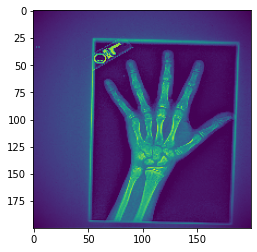

In [20]:
#Menampilkan salah satu image input 
%pylab inline
plt.figure()
plt.imshow(input_arr[0].reshape(200,200)) 
plt.show()  # display it

In [21]:
#Prediksi image dalam batch
predictions = new_model.predict(input_arr)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


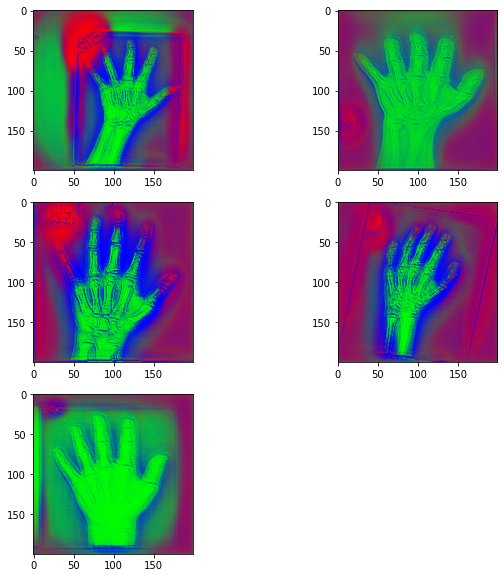

In [22]:
predictions = predictions.reshape((batch_size2,200,200,3))

fig = plt.figure(figsize=(10, 10))
for i in range(batch_size2):
   fig.add_subplot(3, 2, i+1)
   plt.imshow(predictions[i])